# Retail Data Wrangling and Analytics

In [95]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import psycopg2 as ps
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings("ignore")

# Load Data from PSQL into DataFrame

In [2]:
# Connect to Postgres
conn2 = ps.connect(dbname="postgres",
                  user = "postgres",
                  password = "tarek102030",
                  host = "jrvs-psql",
                  port = "5432")

In [3]:
# Convert retail table to a Dataframe
df = pd.read_sql_query(""" select * 
                    from public.retail""",conn2)

In [4]:
# Display the first 5 rows of the retail table
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Display the last 5 rows of the retail table
df.tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [6]:
# Randomly select 10 entities
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
1011885,577730,22517,CHILDS GARDEN RAKE PINK,2,2011-11-21 12:59:00,2.10,17253.0,United Kingdom
19195,490964,21085,SET/6 WOODLAND PAPER CUPS,1,2009-12-08 16:09:00,0.65,14646.0,Netherlands
602287,542662,20726,LUNCH BAG WOODLAND,10,2011-01-31 12:10:00,1.65,18145.0,United Kingdom
128057,501574,21929,JUMBO BAG PINK VINTAGE PAISLEY,10,2010-03-18 09:49:00,1.95,18187.0,United Kingdom
414527,528967,22110,BIRD HOUSE HOT WATER BOTTLE,6,2010-10-26 10:14:00,2.55,14673.0,United Kingdom
735336,555275,23302,KNEELING MAT HOUSEWORK DESIGN,2,2011-06-01 17:18:00,3.29,NaN,United Kingdom
423287,529843,21733,RED HANGING HEART T-LIGHT HOLDER,4,2010-10-31 12:56:00,2.95,16065.0,United Kingdom
228511,511497,22399,MAGNETS PACK OF 4 CHILDHOOD MEMORY,12,2010-06-08 14:40:00,1.25,13089.0,United Kingdom
657551,547654,21770,OPEN CLOSED METAL SIGN,2,2011-03-24 12:32:00,4.95,14527.0,United Kingdom
822001,562918,23301,GARDENERS KNEELING PAD KEEP CALM,12,2011-08-10 13:51:00,1.65,15615.0,United Kingdom


In [7]:
# Retail table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [8]:
# Descriptive statistics of the retail dataframe
df.describe()

,quantity,unit_price,customer_id
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359440e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Load CSV into Dataframe

In [9]:
# Read the csv file
retail_df = pd.read_csv('../data/online_retail_II.csv')
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
# Rename all columns
retail_df.rename(columns = {'Invoice':'invoice_no', 
                            'StockCode':'stock_code',
                            'Description':'description', 
                            'Quantity':'quantity',
                            'InvoiceDate':'invoice_date', 
                            'Price':'unit_price',
                            'Customer ID':'customer_id', 
                            'Country':'country'}, inplace = True)

In [60]:
# Convert invoice_date column to datetime data type
retail_df['invoice_date']= pd.to_datetime(retail_df['invoice_date'])
retail_df.info()
retail_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# Total Invoice Amount Distribution

## Calculate the invoice amount.

In [12]:
# Create an invoice amount column (quantity * unit_price)
df['invoice_amount'] = df['quantity'] * df['unit_price'] 
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [13]:
# Let's clean the data first by removing negative values
df_clean = df[(df['quantity'] > 0) & (df['unit_price'] > 0)]
df_clean

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [14]:
# Create an invoice amount column of each order (quantity * unit_price)
df_clean['invoice_amount'] = df_clean['quantity'] * df_clean['unit_price'] 
df_clean

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [15]:
# Using groupby to find the total amount of each invoice.
df_clean.groupby('invoice_no').sum()


,quantity,unit_price,customer_id,invoice_amount
invoice_no,,,,
489434,166,32.65,104680.0,505.30
489435,60,10.50,52340.0,145.80
489436,193,70.88,248482.0,630.33
489437,145,83.45,353326.0,310.75
489438,826,44.05,307734.0,2286.24
...,...,...,...,...
581585,278,37.78,331884.0,329.05
581586,66,20.23,52452.0,339.20
581587,106,62.50,202880.0,267.45


In [62]:
# Finding the total invoice amount for each invoice number
df_clean.groupby('invoice_no').sum()['invoice_amount']

invoice_no
489434       505.30
489435       145.80
489436       630.33
489437       310.75
489438      2286.24
             ...   
581585       329.05
581586       339.20
581587       267.45
A563185    11062.10
C496350      373.57
Name: invoice_amount, Length: 40078, dtype: float64

## Draw the distribution of invoice amount with min, max, median, mode, and mean. 

In [63]:
# Create show_distribution function
def show_distribution(df):
    min_value = df.min()
    mean = df.mean()
    median = df.median()
    mode = df.mode()[0]
    max_value = df.max()
    
# Print distribution values
    print(f'Minimum:{min_value}\nMean:{mean}\nMedian:{median}\nMode:{mode}\nMaximum:{max_value}\n')
          
# Plot the histogram    
    fig, ax = plt.subplots(2, 1, figsize = (12,8))

    ax[0].hist(df)       
    ax[0].axvline(x=min_value, linestyle = "--", linewidth = 3, color='r')
    ax[0].axvline(x=mean, linestyle = "--", linewidth = 3, color='b')
    ax[0].axvline(x=median, linestyle = "--", linewidth = 3, color='g')
    ax[0].axvline(x=mode, linestyle = "--", linewidth = 3, color='y')
    ax[0].axvline(x=max_value, linestyle = "--", linewidth = 3, color='k') 
    
    ax[0].set_title("Invoice Distribution",fontsize=25)
    ax[0].set_ylabel('Frequency', fontsize=22)
    
# Plot the box plot
    ax[1].boxplot(df, vert=False)
    ax[1].set_xlabel('Value', fontsize=22)

Minimum:0.001
Mean:20.133965645563766
Median:9.96
Mode:15.0
Maximum:168469.6



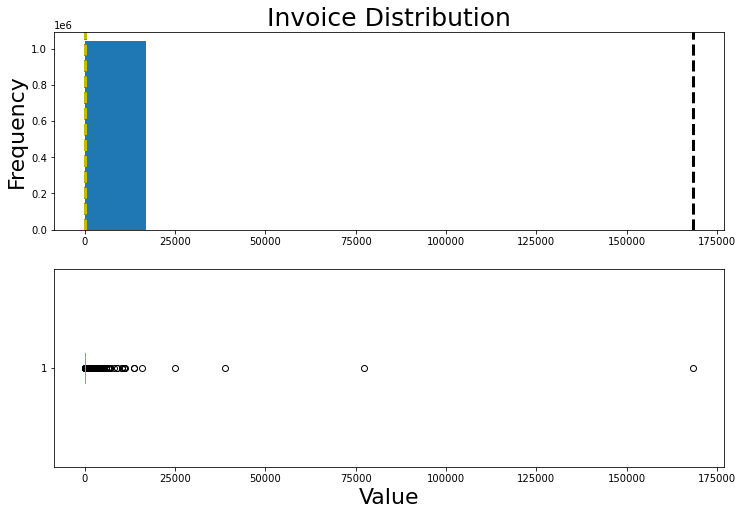

In [64]:
show_distribution(df_clean['invoice_amount'])

## Draw the distribution for the first 85 quantiles of the invoice amount data with min, max, median, mod, and mean.

Minimum:0.001
Mean:9.045763373619188
Median:7.62
Mode:15.0
Maximum:24.96



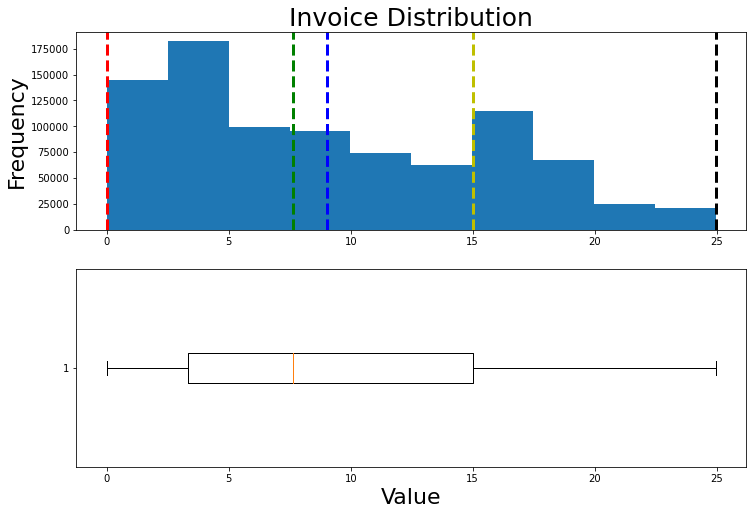

In [67]:

show_distribution(df_clean['invoice_amount'][df_clean['invoice_amount'].between(df_clean['invoice_amount'].quantile(0), df_clean['invoice_amount'].quantile(0.85))])

# Monthly Placed and Canceled Orders

In [73]:
# Create a YYYYMM colum 
df['YYYYMM'] = df['invoice_date'].dt.strftime('%Y%m')
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount,YYYYMM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,200912
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,201112
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,201112


In [74]:
# Getting placed orders dataframe
df_placed=df[~df['invoice_no'].str.startswith('C')]
df_placed

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount,YYYYMM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,200912
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,201112
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,201112


In [75]:
df_placedMonthly=df_placed.groupby('YYYYMM')['invoice_no'].nunique()
df_placedMonthly

YYYYMM
200912    1512
201001    1011
201002    1106
201003    1524
201004    1329
201005    1377
201006    1497
201007    1381
201008    1293
201009    1689
201010    2133
201011    2587
201012    1400
201101     987
201102     998
201103    1321
201104    1149
201105    1555
201106    1393
201107    1331
201108    1281
201109    1756
201110    1929
201111    2658
201112     778
Name: invoice_no, dtype: int64

In [76]:
# Retrive canceled orders
df_cancel=df[df['invoice_no'].str.startswith('C')]
df_cancel

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount,YYYYMM
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,200912
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90,200912
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00,200912
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60,200912
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,200912
...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,201112
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,201112
1067179,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,201112
1067180,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,201112


In [77]:
# Number of canceled orders each month
df_cancelMonthly=df_cancel.groupby('YYYYMM')['invoice_no'].nunique()
df_cancelMonthly

YYYYMM
200912    388
201001    285
201002    229
201003    383
201004    286
201005    391
201006    336
201007    332
201008    254
201009    352
201010    453
201011    558
201012    308
201101    249
201102    204
201103    298
201104    235
201105    294
201106    314
201107    262
201108    263
201109    322
201110    334
201111    428
201112    143
Name: invoice_no, dtype: int64

In [85]:
# Concat Placed and Canceled tables into one
df_placed_canceled=pd.concat([df_placedMonthly,df_cancelMonthly],axis=1,keys=['Placed_orders', 'Canceled_orders'])
df_placed_canceled

,Placed_orders,Canceled_orders
YYYYMM,,
200912,1512,388
201001,1011,285
201002,1106,229
201003,1524,383
201004,1329,286
201005,1377,391
201006,1497,336
201007,1381,332
201008,1293,254


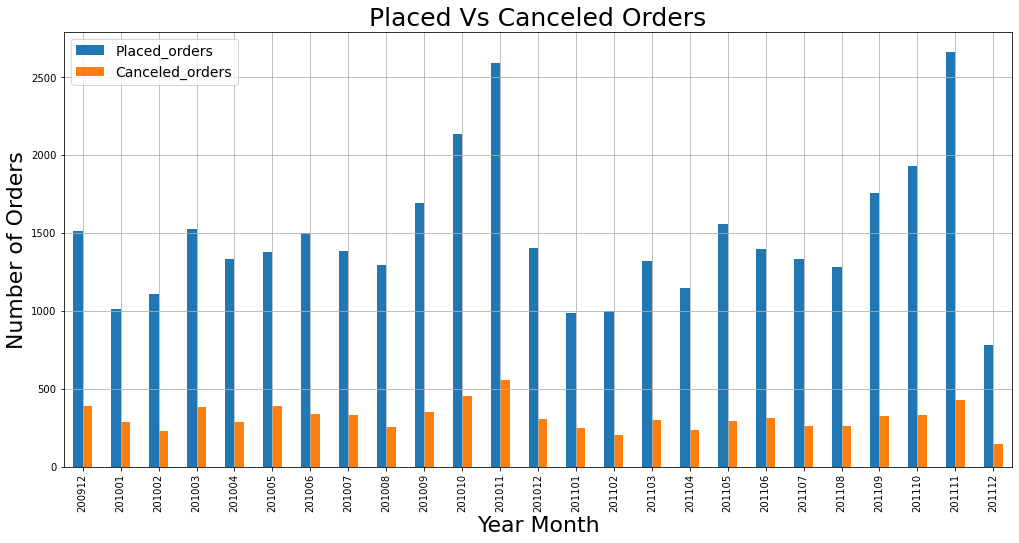

In [86]:
# Plot Placed vs Canceled orders

df_placed_canceled.plot.bar(figsize=(17,8));

plt.title('Placed Vs Canceled Orders',fontsize=25)
plt.xlabel('Year Month', fontsize=22)
plt.ylabel('Number of Orders', fontsize=22)
plt.legend(fontsize=14)
plt.grid()
plt.show();


# Monthly Sales

In [88]:
# Ignoring the canceled orders
df_sales = df[~df['invoice_no'].str.startswith('C')]

# Finding the total invoice amount for each month
df_sales_total=df_sales.groupby('YYYYMM').sum()
df_sales_total['invoice_amount']


YYYYMM
200912     686654.160
201001     557319.062
201002     506371.066
201003     699608.991
201004     594609.192
201005     599985.790
201006     639066.580
201007     591636.740
201008     604242.650
201009     831615.001
201010    1036680.000
201011    1172336.042
201012     884591.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518210.790
Name: invoice_amount, dtype: float64

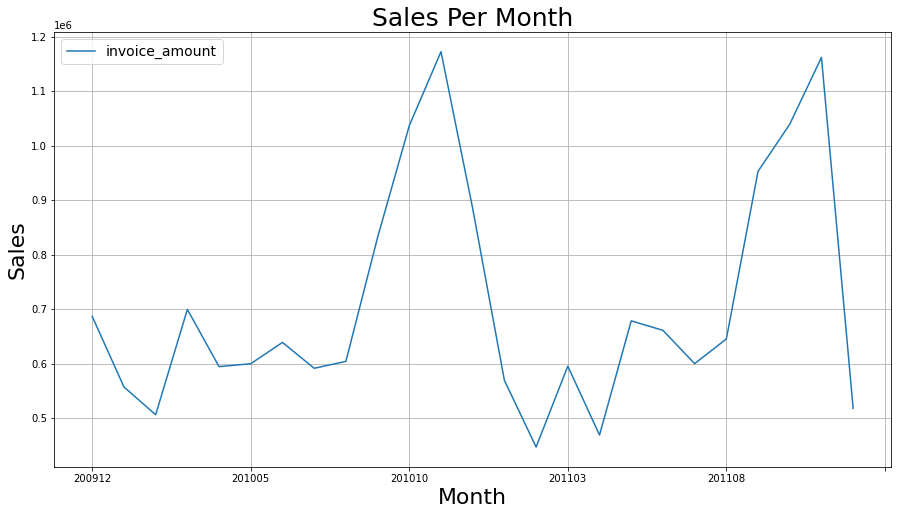

In [89]:
# Plotting the sales per month
df_sales_total.plot(y='invoice_amount', use_index=True,figsize=(15, 8))
plt.title('Sales Per Month',fontsize=25)

plt.xlabel('Month', fontsize=22)
plt.ylabel('Sales', fontsize=22)
plt.legend(fontsize=14)
plt.grid()
plt.show();

# We can see that the sales were high in Nov 2010 and Nov 2011

# Monthly Sales Growth


In [31]:
# Calculating the monthly sales percentage growth
df_sales_total['sales_growth']=df_sales_total['invoice_amount'].pct_change().mul(100).round(2)
df_sales_total[['invoice_amount','sales_growth']]

,invoice_amount,sales_growth
YYYYMM,,
200912,825685.760,NaN
201001,652708.502,-20.95
201002,553339.736,-15.22
201003,833570.131,50.64
201004,627934.592,-24.67
201005,659858.860,5.08
201006,752270.150,14.00
201007,606681.140,-19.35
201008,697274.910,14.93


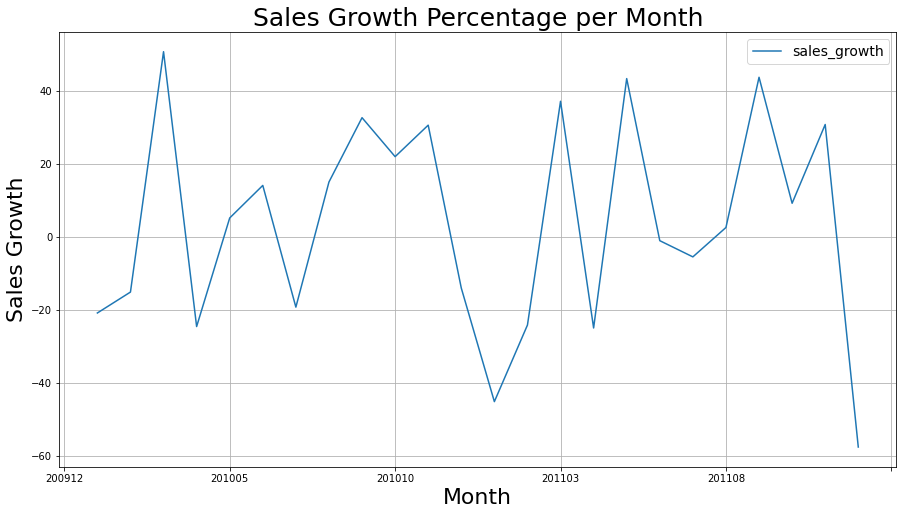

In [32]:
# Plotting the sales growth percentage per month
df_sales_total.plot(y='sales_growth', use_index=True,figsize=(15, 8))
plt.title('Sales Growth Percentage per Month',fontsize=25)
plt.xlabel('Month', fontsize=22)
plt.ylabel('Sales Growth', fontsize=22)
plt.grid()
plt.legend(fontsize=14)
plt.show();

# Monthly Active Users

In [33]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount,YYYYMM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912


In [34]:
# group by YYYYMM and count number of unique customers
uniqe=df.groupby('YYYYMM')['customer_id'].nunique()
uniqe

YYYYMM
200912    1045
201001     786
201002     807
201003    1111
201004     998
201005    1062
201006    1095
201007     988
201008     964
201009    1202
201010    1577
201011    1683
201012     948
201101     783
201102     798
201103    1020
201104     899
201105    1079
201106    1051
201107     993
201108     980
201109    1302
201110    1425
201111    1711
201112     686
Name: customer_id, dtype: int64

In [35]:
# Double check
len(df[df['YYYYMM']=='200912'].groupby('customer_id').count())

# We have 1045 unique customers in Dec 2009, which is the same as in the series above

1045

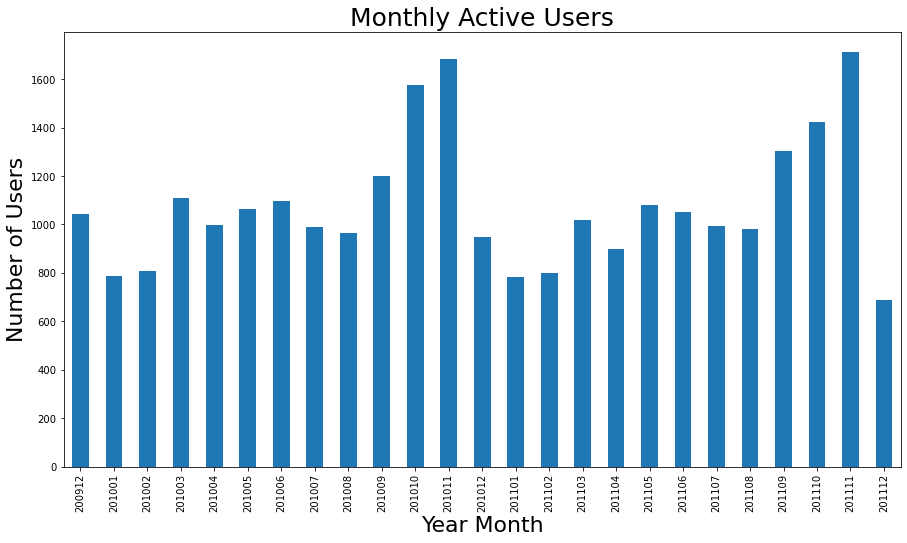

In [36]:
# Plotting the sales growth per month
uniqe.plot.bar(figsize=(15, 8))
plt.title('Monthly Active Users',fontsize=25)
plt.xticks(rotation=90)
plt.xlabel('Year Month', fontsize=22)
plt.ylabel('Number of Users', fontsize=22)
plt.show();

# New and Existing Users



In [37]:
# Finding the first purchase of each customer
first_purchase = df.groupby("customer_id")['YYYYMM'].min().reset_index()
first_purchase.head()

,customer_id,YYYYMM
0,12346.0,200912
1,12347.0,201010
2,12348.0,201009
3,12349.0,200912
4,12350.0,201102


In [38]:
# Finding all customers per month by dropping duplicates
all_users = df[["customer_id", "YYYYMM"]].drop_duplicates()
all_users.head()

,customer_id,YYYYMM
0,13085.0,200912
12,13078.0,200912
31,15362.0,200912
54,18102.0,200912
71,12682.0,200912


In [39]:
#merging the two tables above to help us identify the new users
merged_user = pd.merge(first_purchase, all_users, on='customer_id')
merged_user

,customer_id,YYYYMM_x,YYYYMM_y
0,12346.0,200912,200912
1,12346.0,200912,201001
2,12346.0,200912,201003
3,12346.0,200912,201006
4,12346.0,200912,201010
...,...,...,...
26988,18287.0,200912,201005
26989,18287.0,200912,201009
26990,18287.0,200912,201011
26991,18287.0,200912,201105


In [40]:
# Counting number of new users each month
new_users = merged_user[merged_user['YYYYMM_x'] == merged_user['YYYYMM_y']] # Identifing new users each month
new_users
new_user_count = new_users.groupby("YYYYMM_x")['customer_id'].count()
new_user_count

YYYYMM_x
200912    1045
201001     394
201002     363
201003     436
201004     291
201005     254
201006     269
201007     183
201008     158
201009     242
201010     379
201011     322
201012      77
201101      71
201102     123
201103     178
201104     105
201105     108
201106     108
201107     102
201108     106
201109     187
201110     221
201111     192
201112      28
Name: customer_id, dtype: int64

In [41]:
# Counting existing users
existing_users = merged_user[merged_user['YYYYMM_x'] < merged_user['YYYYMM_y']]
existing_users_count = existing_users.groupby("YYYYMM_y")['customer_id'].count()
existing_users_count

YYYYMM_y
201001     392
201002     444
201003     675
201004     707
201005     808
201006     826
201007     805
201008     806
201009     960
201010    1198
201011    1361
201012     871
201101     712
201102     675
201103     842
201104     794
201105     971
201106     943
201107     891
201108     874
201109    1115
201110    1204
201111    1519
201112     658
Name: customer_id, dtype: int64

In [91]:
# Join the two tables together
nw_ex = pd.concat([new_user_count, existing_users_count], axis=1).fillna(0) # fill nn values with 0
nw_ex.columns = ['new_users', 'existing_users'] # rename columns
nw_ex.head()

,new_users,existing_users
200912,1045,0.0
201001,394,392.0
201002,363,444.0
201003,436,675.0
201004,291,707.0


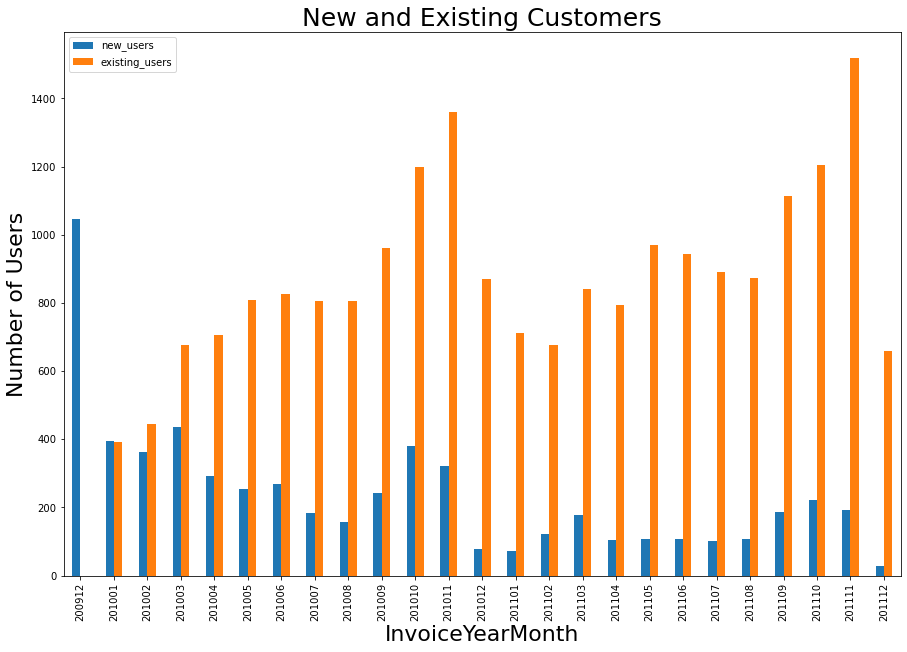

In [93]:
# Plotting new users and existing users

nw_ex.plot.bar(figsize=(15,10))

plt.title("New and Existing Customers", fontsize=25)
plt.xlabel("InvoiceYearMonth", fontsize=22)
plt.ylabel("Number of Users", fontsize=22)
plt.show()

## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

In [44]:
# First we need to check if we have null customer IDs
df.customer_id.isna().sum() # We have 243007 nan values, let's clean our dataframe
df= df[pd.notnull(df['customer_id'])]
df.customer_id.isna().sum() # Good to go

0

In [45]:
df_sub=df[['customer_id','invoice_date','invoice_no','invoice_amount']]
df_sub

,customer_id,invoice_date,invoice_no,invoice_amount
0,13085.0,2009-12-01 07:45:00,489434,83.40
1,13085.0,2009-12-01 07:45:00,489434,81.00
2,13085.0,2009-12-01 07:45:00,489434,81.00
3,13085.0,2009-12-01 07:45:00,489434,100.80
4,13085.0,2009-12-01 07:45:00,489434,30.00
...,...,...,...,...
1067366,12680.0,2011-12-09 12:50:00,581587,12.60
1067367,12680.0,2011-12-09 12:50:00,581587,16.60
1067368,12680.0,2011-12-09 12:50:00,581587,16.60
1067369,12680.0,2011-12-09 12:50:00,581587,14.85


In [46]:
# Calculate recency
df_rc = df_sub.groupby('customer_id',as_index=False)['invoice_date'].max() 
df_rc

recent_date = df_rc['invoice_date'].max()
# Calculate recency
df_rc['Recency'] = df_rc['invoice_date'].apply(lambda x: (recent_date - x).days)
df_rc.head()

,customer_id,invoice_date,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [47]:
# Calculate frequency
df_freq = df_sub.groupby(by=['customer_id'], as_index=False)['invoice_date'].count()

# Rename column
df_freq.rename(columns = {'invoice_date':'Frequency'}, inplace = True)
df_freq.head()

,customer_id,Frequency
0,12346.0,48
1,12347.0,253
2,12348.0,51
3,12349.0,180
4,12350.0,17


In [48]:
# Calculate Monetary Value
df_mon = df.groupby(by='customer_id', as_index=False)['invoice_amount'].sum()

# Rename column
df_mon.rename(columns = {'invoice_amount':'Monetary_Value'}, inplace = True)
df_mon.head()


,customer_id,Monetary_Value
0,12346.0,-64.68
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40


In [49]:
# Merge them together into one dataframe
df_rfm = pd.merge(pd.merge(df_rc,df_freq,on='customer_id'),df_mon,on='customer_id').drop(columns='invoice_date')
df_rfm.head()

,customer_id,Recency,Frequency,Monetary_Value
0,12346.0,325,48,-64.68
1,12347.0,1,253,5633.32
2,12348.0,74,51,2019.40
3,12349.0,18,180,4404.54
4,12350.0,309,17,334.40


# RFM Segmentation

In [50]:
#RFM score values 
df_rfm['RecencyScore'] = pd.qcut(df_rfm['Recency'],5,labels=[5,4,3,2,1])
df_rfm['FrequencyScore'] = pd.qcut(df_rfm['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
df_rfm['MonetaryScore'] = pd.qcut(df_rfm['Monetary_Value'],5,labels=[1,2,3,4,5])
df_rfm.head()

,customer_id,Recency,Frequency,Monetary_Value,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,48,-64.68,2,3,1
1,12347.0,1,253,5633.32,5,5,5
2,12348.0,74,51,2019.40,3,3,4
3,12349.0,18,180,4404.54,4,4,5
4,12350.0,309,17,334.40,2,2,2


In [51]:
#calculation of the RFM score
df_rfm["RFM_SCORE"] = df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str) + df_rfm['MonetaryScore'].astype(str)
df_rfm.head()

,customer_id,Recency,Frequency,Monetary_Value,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,12346.0,325,48,-64.68,2,3,1,231
1,12347.0,1,253,5633.32,5,5,5,555
2,12348.0,74,51,2019.40,3,3,4,334
3,12349.0,18,180,4404.54,4,4,5,445
4,12350.0,309,17,334.40,2,2,2,222


In [52]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [53]:
#creation of segment variable
df_rfm['Segment'] = df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str)
df_rfm['Segment'] = df_rfm['Segment'].replace(seg_map, regex=True)
df_rfm.head()

,customer_id,Recency,Frequency,Monetary_Value,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.0,325,48,-64.68,2,3,1,231,At Risk
1,12347.0,1,253,5633.32,5,5,5,555,Champions
2,12348.0,74,51,2019.40,3,3,4,334,Need Attention
3,12349.0,18,180,4404.54,4,4,5,445,Loyal Customers
4,12350.0,309,17,334.40,2,2,2,222,Hibernating


In [54]:
# Group by Segment and calculate the mean and count for RFM
df_rfm[["Segment", "Recency","Frequency","Monetary_Value"]].groupby("Segment").agg(["mean","count"])

Recency         Frequency       Monetary_Value      
                           mean count        mean count           mean count
Segment                                                                     
About to Sleep       109.042155   427   18.419204   427     542.137403   427
At Risk              392.401985   806   74.295285   806    1200.544257   806
Can't Lose           340.490566   106  322.188679   106    4341.795019   106
Champions              6.825511   831  453.965102   831   10580.702593   831
Hibernating          458.729323  1463   15.640465  1463     309.924990  1463
Loyal Customers       63.510841  1153  238.626193  1153    3894.640213  1153
Need Attention       107.238095   273   55.948718   273    1397.008612   273
New Customers          8.818182    66    8.484848    66     648.581515    66
Potential Loyalists   23.956772   694   43.572046   694    1124.682278   694
Promising             35.016260   123    9.178862   123     387.863821   123

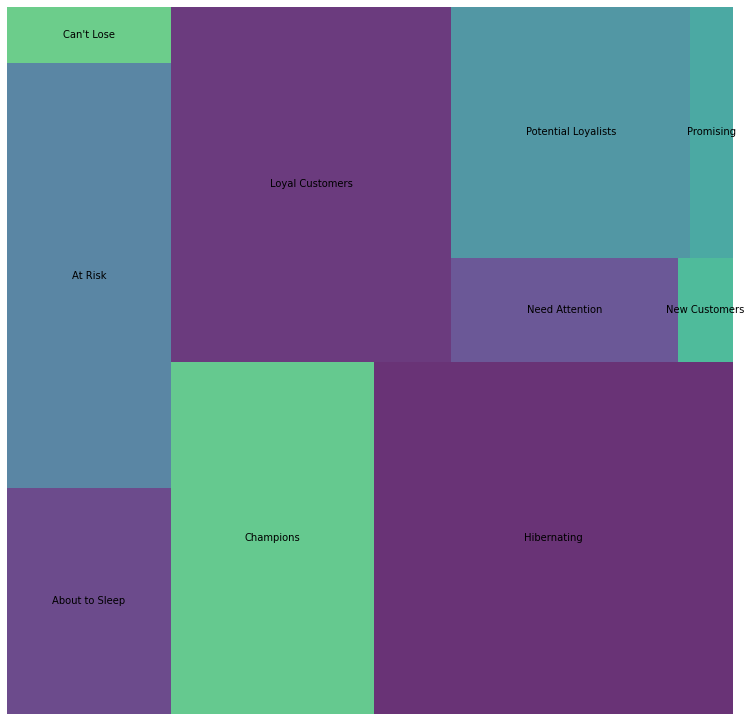

In [96]:
# Plotting tree map
df_treemap = df_rfm.groupby('Segment').agg(customers=('customer_id', 'count')).reset_index()
df_treemap.head()

fig, ax = plt.subplots(1, figsize = (13,13))

squarify.plot(sizes=df_treemap['customers'],label=df_treemap['Segment'], alpha=0.8)

plt.axis('off')
plt.show()

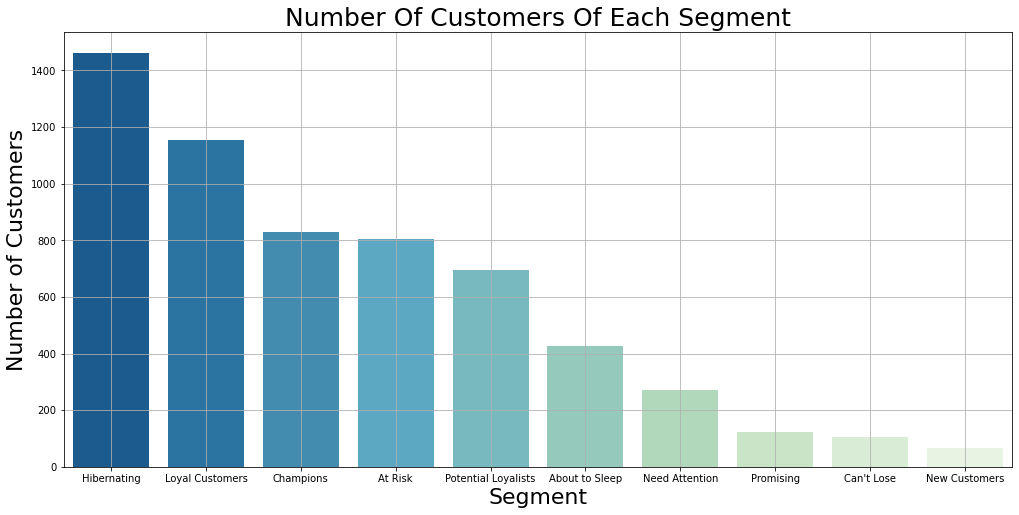

In [57]:
#plotting number of customers per segment
cust_seg = df_rfm.groupby('Segment')['customer_id'].nunique()
cust_seg=cust_seg.sort_values(ascending=False).reset_index()

plt.figure(figsize=(17,8))

sns.barplot(data=cust_seg, x='Segment', y='customer_id', palette="GnBu_r")

plt.title('Number Of Customers Of Each Segment',fontsize = 25)
plt.xlabel('Segment', fontsize = 22)
plt.ylabel('Number of Customers', fontsize = 22)
plt.grid()
